# The Spark Foundation
## Color Identification in Images
### Name: Amrit Giri 
### January'24 Batch

In [46]:
"""
Importing required library for color detection of image
"""

import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [47]:
"""
Assigning path for image of which color is to be detected which is stored in img_path variable
And also csv path that is the list of colours available
"""
img_path = './DSC02809.JPG'
csv_path = './colours.csv'

In [48]:
"""
reading the image details using opencv and resizing its width and height
"""
img = cv2.imread(img_path)
img = cv2.resize(img,(960,540))


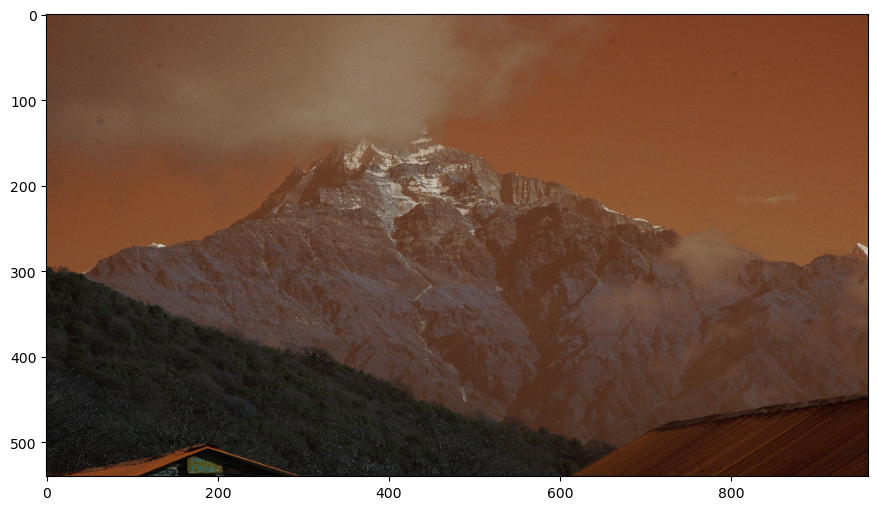

In [49]:
"""
Plotting the image
"""
plt.figure(figsize=(18,6))
plt.imshow(img)

In [50]:
"""
Converting the blue green red color format to red green blue format which is standard
"""
grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

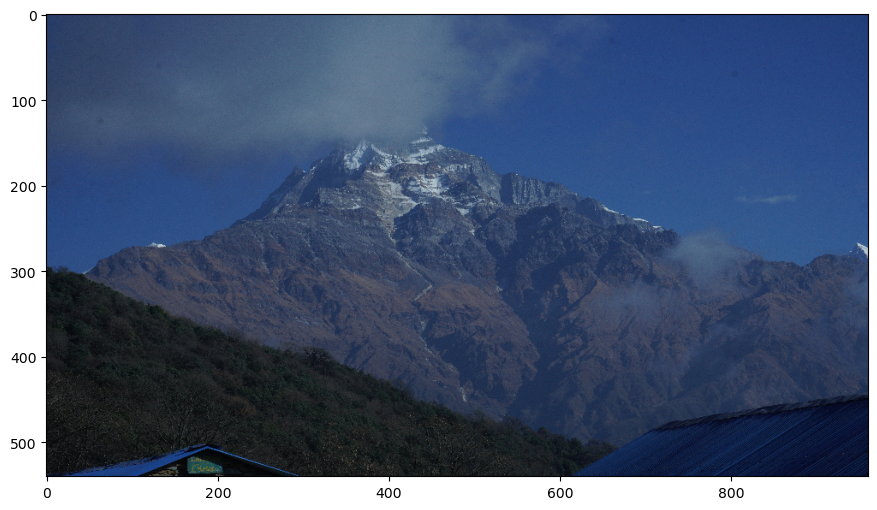

In [51]:
"""
Plotting the RGB format image
"""
plt.figure(figsize=(18,6))
plt.imshow(grid_RGB)

In [40]:
"""
Assigning the output format that is to be shown when double clicked anywhere on the image
"""
index = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=index, header=None)
# print(df)

In [41]:
"""
Initializing the default value of required variables
"""
clicked = False
r = g = b = xpos = ypos = 0

In [42]:
"""
Defining a function to define color from the csv file when a point is double clicked on the image
"""
def get_color_name(R,G,B):
    minimum = 1000
    for i in range(len(df)):
        d = abs(R - int(df.loc[i,'R'])) + abs(G - int(df.loc[i,'G'])) + abs(B-int(df.loc[i,'B']))
        if d <= minimum:
            minimum = d
            cname = df.loc[i,'color_name']
    return cname

In [43]:
"""
This function handles the mouse event, specially double clicked (cv2.EVENT_LBUTTONDBLCLK)
WHILE double clicked capture
mouse position
color info
"""
def draw_function(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, xpos, ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [44]:
"""
Setting up OpenCV window
and mouse callback function to find whether the event occures in the window
"""
cv2.namedWindow('Color Identification in Images')
cv2.setMouseCallback('Color Identification in Images', draw_function)

In [45]:
"""
Displaying image and update display image based on user interaction
"""
while True:
    cv2.imshow('Color Identification in Images', img)
    if clicked:
        cv2.rectangle(img, (20,20), (600,60), (b,g,r), -1)

        text = get_color_name(r,g,b) + 'R = ' + str(r) + 'G = ' + str(g) + 'B = ' + str(b)

        cv2.putText(img, text, (50,50), 2,0.8, (255,255,255) , 2 , cv2.LINE_AA)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()